<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/RNN_FOR_DATA_PICTURE_edit_for_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
replace DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 14.1 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)




      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_void
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.089_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.076_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.095_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.044_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.066_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.097_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.05_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.078_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.042_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.025_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.093_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.089_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.093_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.099_void_0.3.csv
/content

In [7]:
store_data_set

{'picture_alpha': [{'x': array([[ 64.95521883,  64.95966909,  64.95813912],
          [ 80.01509194,  80.01485288,  80.01373635],
          [ 95.04215836,  95.0440897 ,  95.04227785],
          [110.05546955, 110.05850138, 110.05434188],
          [125.05937555, 125.06296836, 125.06378585],
          [140.10296453, 140.10298788, 140.09893494],
          [155.1228522 , 155.12137907, 155.12470177],
          [170.14995846, 170.15763878, 170.15399195],
          [185.1938922 , 185.19768495, 185.19756707],
          [200.22353995, 200.22675956, 200.22487413],
          [215.2776627 , 215.27642967, 215.27363876],
          [230.30235241, 230.29702332, 230.29832506],
          [245.3319206 , 245.34088946, 245.33775398],
          [260.38295332, 260.38262213, 260.38220614],
          [275.42147531, 275.42146197, 275.42351437],
          [330.3901545 , 330.38493636, 330.3942429 ]]),
   'y': array([[ 1.16088616e-02, -4.98595629e+00, -9.98735629e+00],
          [ 2.15068958e-02, -4.97336146e+00,

In [11]:
total_x_y_z , label = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_x_y_z.append(img)
      label.append(i)


In [18]:
x_true , y_true , z_true = [] , [] , []
for i in total_x_y_z:
  x_true.append(i['x'])
  y_true.append(i['y'])
  z_true.append(i['z'])


In [22]:
x_true = np.array(x_true).reshape(-1 , 16 , 3 , 1 )
y_true = np.array(y_true).reshape(-1 , 16 , 3 , 1 )
z_true = np.array(z_true).reshape(-1 , 16 , 3 , 1 )

In [24]:
x_true.shape

(396, 16, 3, 1)

In [27]:
TOTAL_X_true_vector = []
TOTAL_Y_x_true_vector = []

for picture in x_true :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_true_vector.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_x_true_vector.append(picture[i + window_size])

TOTAL_X_true_vector_array = np.array(TOTAL_X_true_vector).reshape(-1 , 2 , 3 )
TOTAL_Y_x_true_vector_array = np.array(TOTAL_Y_x_true_vector).reshape(-1 , 3 )


In [29]:
TOTAL_X_true_vector_array.shape

(5544, 2, 3)

In [30]:
TOTAL_Y_x_true_vector_array.shape

(5544, 3)

In [ ]:
# import matplotlib.colors
# rotated_data = np.rot90(picture_reshaped)
# img = plt.imshow(rotated_data ,  cmap='viridis'  )
# cbar = plt.colorbar(img,)
# cbar.set_label('Intensity Value', fontsize=12)
# plt.title('Image value z of a sample picture Health blade')
# plt.show()
# print(x[0][ : , : , 0 ])

In [31]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_true_vector_array,TOTAL_Y_x_true_vector_array , test_size=0.3 , random_state = 42 )

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 64 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(32, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,587 (76.51 KB)

 Trainable params: 19,587 (76.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
97/97 - 4s - 38ms/step - loss: 40492.7930 - mse: 40492.7930 - val_loss: 36681.8438 - val_mse: 36681.8438
Epoch 2/100
97/97 - 1s - 9ms/step - loss: 29250.3086 - mse: 29250.3086 - val_loss: 21552.8223 - val_mse: 21552.8223
Epoch 3/100
97/97 - 0s - 5ms/step - loss: 14356.1172 - mse: 14356.1172 - val_loss: 8909.4629 - val_mse: 8909.4629
Epoch 4/100
97/97 - 0s - 5ms/step - loss: 6288.9209 - mse: 6288.9209 - val_loss: 4055.5203 - val_mse: 4055.5203
Epoch 5/100
97/97 - 1s - 7ms/step - loss: 2653.8235 - mse: 2653.8235 - val_loss: 1505.3138 - val_mse: 1505.3138
Epoch 6/100
97/97 - 1s - 7ms/step - loss: 1143.4006 - mse: 1143.4006 - val_loss: 623.4779 - val_mse: 623.4779
Epoch 7/100
97/97 - 0s - 5ms/step - loss: 684.7142 - mse: 684.7142 - val_loss: 318.4022 - val_mse: 318.4022
Epoch 8/100
97/97 - 0s - 5ms/step - loss: 522.2178 - mse: 522.2178 - val_loss: 203.7067 - val_mse: 203.7067
Epoch 9/100
97/97 - 1s - 7ms/step - loss: 461.0995 - mse: 461.0995 - val_loss: 164.9502 - val_mse: 164.

In [33]:
model.inputs

[<KerasTensor shape=(None, 2, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>]

In [34]:
model.outputs

[<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_4>]

In [35]:
model.output_shape

(None, 3)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


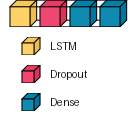

In [36]:
visualkeras.layered_view(model, legend=True )

In [37]:
x_train.shape

(3880, 2, 3)

In [38]:
y_pre_for_total_x_train = model.predict(x_train)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
y_test.shape

(1664, 3)

In [40]:
y_pre_for_total_x_train.shape

(3880, 3)

In [41]:
for index in range(len(y_train)):
  print(y_train[index])
  print(y_pre_for_total_x_train[index])
  print(" ******** ------- ******* ")
  if index > 1 :
    break

[185.19742884 185.19516362 185.1941692 ]
[188.30444 188.04744 188.34737]
 ******** ------- ******* 
[215.27145    215.27487676 215.28211874]
[217.66978 217.60817 217.83028]
 ******** ------- ******* 
[260.37891381 260.38080295 260.38115601]
[261.06552 261.34415 261.20245]
 ******** ------- ******* 
[330.38628016 330.3922169  330.39672774]
[315.11343 315.61707 314.9309 ]
 ******** ------- ******* 
[140.10239588 140.10367664 140.10277406]
[137.29114 136.66911 137.03566]
 ******** ------- ******* 
[260.37880775 260.37731966 260.38161743]
[261.06638 261.345   261.20328]
 ******** ------- ******* 
[185.19479871 185.20514537 185.19885362]
[188.30829 188.0512  188.35121]
 ******** ------- ******* 
[200.22789381 200.22701651 200.22390539]
[204.22641 204.06935 204.33708]
 ******** ------- ******* 
[245.33357773 245.33299046 245.33923451]
[243.30656 243.46089 243.49513]
 ******** ------- ******* 
[110.05480069 110.05646085 110.05594118]
[110.76908 110.18749 110.28444]
 ******** ------- ******* 


In [42]:
y_predict = model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
y_predict.shape

(1664, 3)

In [44]:
y_test.shape

(1664, 3)

In [45]:
t = []
t.append(x_test[0])
t = np.array(t)
y_t = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [46]:
t.shape

(1, 2, 3)

In [48]:
t

array([[[185.19016388, 185.19636824, 185.20034603],
        [200.22228466, 200.21917194, 200.21696437]]])

In [47]:
y_test[0]

array([215.27472257, 215.27597606, 215.27480458])

In [ ]:
y_t

array([[3.3758416, 3.3798318, 3.3634691]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


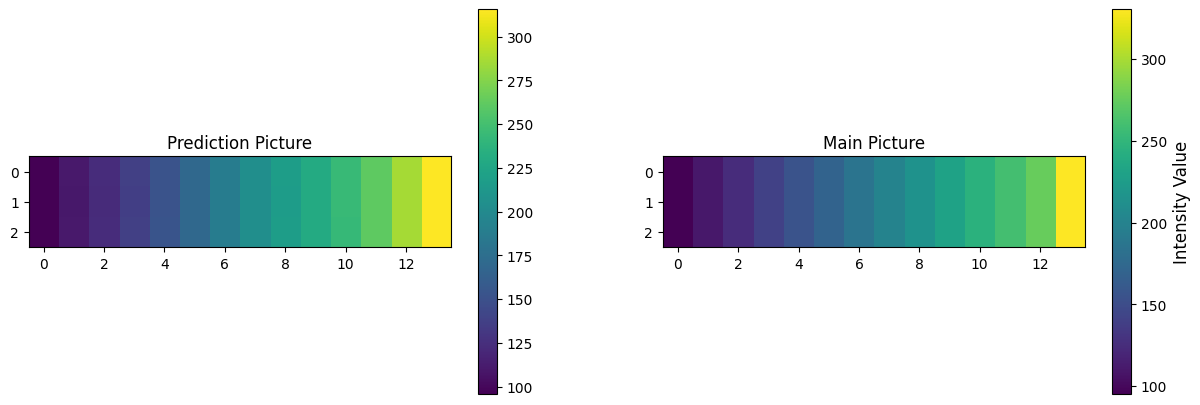

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


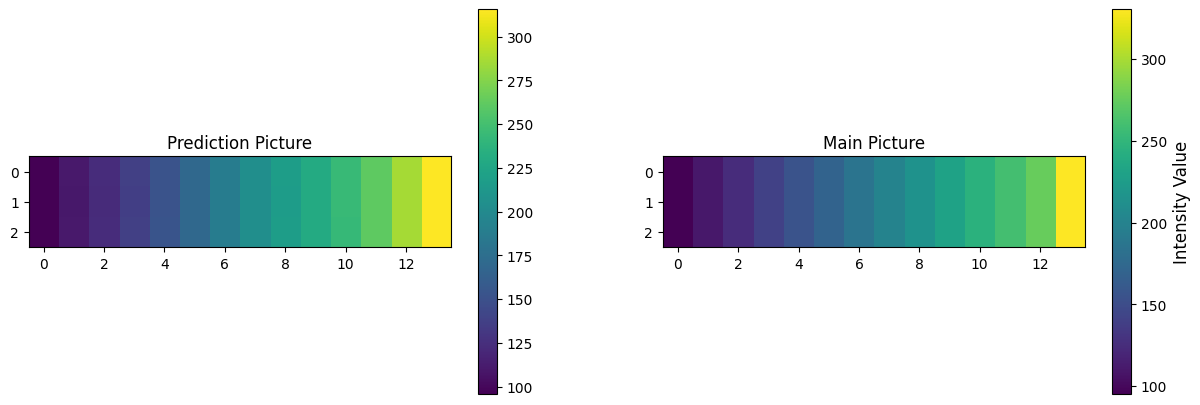

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


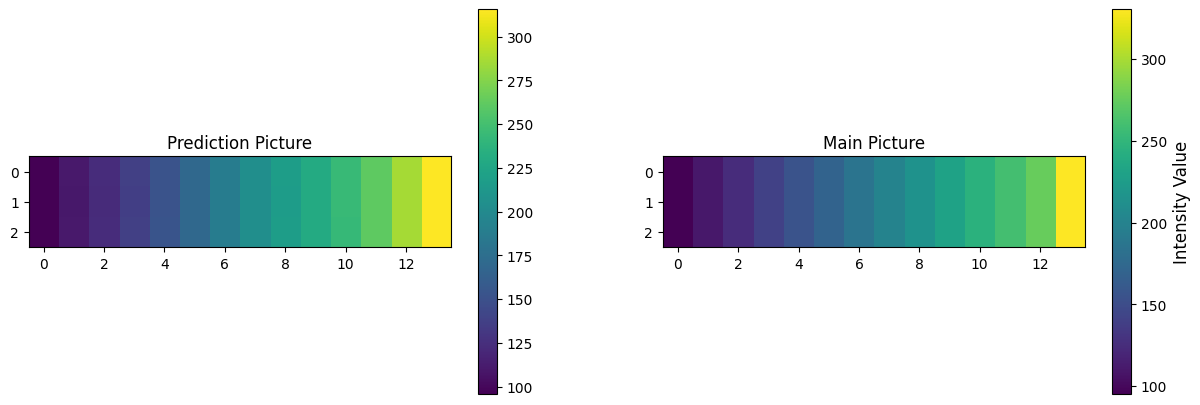

In [50]:
r = 0
TOTAL_MSE_x_HEALTH_TRAIN  = []
for picture in x_true[:3] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  fig = plt.figure(figsize = (15 , 5 ) )
  ax1 = fig.add_subplot(1 , 2 , 1 )
  ax2 = fig.add_subplot(1 , 2 , 2 )
  rotated_data = np.rot90(total_y_pre)
  img = ax1.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax1.set_title('Prediction x-Picture')

  rotated_data = np.rot90(new_sample_y_array)
  img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  cbar = plt.colorbar(img,)
  cbar.set_label('Intensity Value', fontsize=12)
  ax2.set_title('Main x-Picture')

  plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_x_HEALTH_TRAIN.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  # if r == 200 :
  #   break






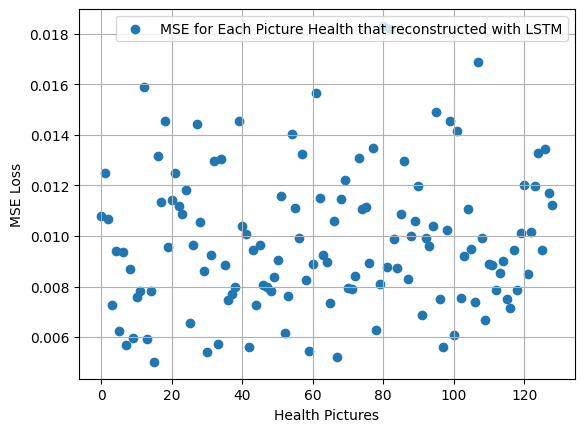

In [ ]:
plt.scatter(range(len(TOTAL_MSE_HEALTH_TRAIN)) , TOTAL_MSE_HEALTH_TRAIN , label="MSE for Each Picture Health that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Health Pictures")
plt.grid()
plt.show()

In [ ]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      x.append(img)
      y.append(i)

x = np.array(x).reshape(-1 , 16 , 3 , 1 )

TOTAL_X_vector_alpha = []
TOTAL_Y_vector_alpha = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_alpha.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_alpha.append(picture[i + window_size])

TOTAL_X_vector_alpha_array = np.array(TOTAL_X_vector_alpha).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_alpha_array = np.array(TOTAL_Y_vector_alpha).reshape(-1 , 3 )

r = 0
TOTAL_MSE_alpha   = []
for picture in x[::2] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted Health by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image Health given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_alpha.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [ ]:
plt.scatter(range(len(TOTAL_MSE_alpha)) , TOTAL_MSE_alpha , label="MSE for Each Picture alpha that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Alpha Category Blade Picture")
plt.grid()
plt.show()

In [ ]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void' :
      x.append(img)
      y.append(i)

x = np.array(x).reshape(-1 , 16 , 3 , 1 )

TOTAL_X_vector_void = []
TOTAL_Y_vector_void = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_void.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_void.append(picture[i + window_size])

TOTAL_X_vector_void_array = np.array(TOTAL_X_vector_void).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_void_array = np.array(TOTAL_Y_vector_void).reshape(-1 , 3 )

r = 0
TOTAL_MSE_void   = []
for picture in x[::2] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted Health by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image Health given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_void.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
new_sample_y_array.shape

(14, 3)

In [ ]:
new_sample_x_array.shape

(14, 2, 3)

In [ ]:
total_y_pre = []
for i in new_sample_x_array :
  t=[]
  t.append(i)
  t = np.array(t)
  y_pre = model.predict(t)
  y_pre = y_pre.tolist()
  total_y_pre.append(y_pre[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
total_y_pre = np.array(total_y_pre)

In [ ]:
total_y_pre.shape

(14, 3)

In [ ]:
total_y_pre

array([[0.08820276, 0.08411194, 0.09013408],
       [0.15143397, 0.14620629, 0.15127295],
       [0.22261724, 0.21776029, 0.2224533 ],
       [0.29768646, 0.29201984, 0.29656166],
       [0.47083747, 0.46391752, 0.46596825],
       [0.75800079, 0.7467711 , 0.74421543],
       [1.01011038, 0.99716938, 0.99219102],
       [1.35388827, 1.33632982, 1.3303386 ],
       [1.70006573, 1.68342733, 1.68268132],
       [2.21103334, 2.18914843, 2.19240522],
       [2.81102276, 2.78247046, 2.78905106],
       [3.43568087, 3.39456749, 3.40399551],
       [4.05242348, 4.00021553, 4.0059886 ],
       [4.90769577, 4.83225203, 4.840837  ]])

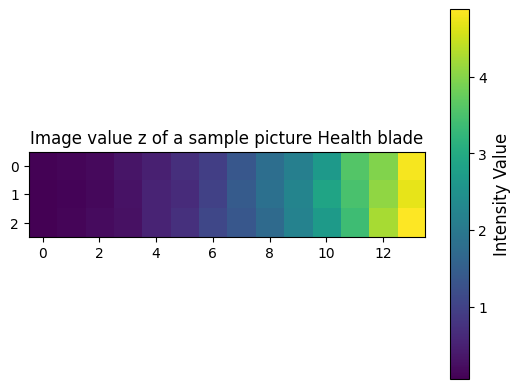

In [ ]:
rotated_data = np.rot90(new_sample_y_array)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()

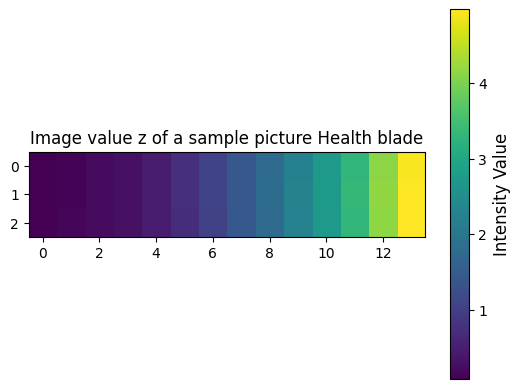

In [ ]:
rotated_data = np.rot90(total_y_pre)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()
